## Predictive Analytics

### Table of Contents
- A short description about data analysis with research question
- Import package
- Load dataset
- Data Analysis
    - Descriptive Analysis
    - Exploratory Data Analysis
    - Predictive Analysis (ARIMA model)
- References
- Answer of reseach question

### Time Series Analysis
Variable: Co2 emission \
Selected Country: USA \
Duration: 2020 to 2030 

A naive and an ARIMA prediction about the CO2 emission levels 

Research Question: **Will Co2 emission be increased or decreased in 2030?**

### Import Packages

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
#from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
#from math import sqrt

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

### Load Dataset

In [3]:
df = pd.read_csv("../dataset/merged_dataset.csv")
df

,Country,Year,Co2,Co2_per_capita,Gdp,Gdp_per_capita,Coal_co2,Cement_co2,Flaring_co2,Gas_co2,...,Cumulative_coal_co2,Cumulative_cement_co2,Cumulative_flaring_co2,Cumulative_gas_co2,Cumulative_oil_co2,Annual_co2_fossil_cement,Co2_per_gdp,Consumption_co2_per_gdp,Consumption_co2,Consumption_co2_per_capita
0,India,1960,120581.961,0.267634,3.702988e+10,82.188603,88003183,4002217,NaN,NaN,...,2.544257e+09,40412383,NaN,NaN,2.509192e+08,111450248,0.2140,NaN,NaN,NaN
1,Japan,1960,232781.160,2.497223,4.430734e+10,475.319076,139144064,11139081,NaN,1.601168e+06,...,5.225208e+09,107824883,NaN,8.566389e+06,4.144143e+08,232499641,0.3889,NaN,NaN,NaN
2,Russia,1960,1448637.349,12.082349,NaN,NaN,585156284,13753032,NaN,6.163598e+07,...,9.795065e+09,106299829,NaN,2.953982e+08,3.075058e+09,882927058,1.3281,NaN,NaN,NaN
3,United States,1960,2890696.100,15.999779,5.433000e+11,3007.123445,917963904,28620891,30315936.0,6.300248e+08,...,7.964596e+10,582717047,4.409771e+08,9.410359e+09,2.888055e+10,2897138041,0.8880,NaN,NaN,NaN
4,India,1961,130402.187,0.283704,3.923244e+10,85.354301,95020481,4204885,NaN,3.664000e+03,...,2.639277e+09,44617268,NaN,3.664000e+03,2.722296e+08,120539453,0.2247,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,United States,2019,NaN,NaN,2.143320e+13,65279.529030,1098853710,40895869,84509725.0,1.694894e+09,...,1.747615e+11,2704391255,2.169299e+09,7.489984e+10,1.561177e+11,5255816207,NaN,NaN,5.625784e+09,17.0963
240,India,2020,NaN,NaN,2.660250e+12,1927.707823,1587552167,122908202,1678112.0,1.269841e+08,...,3.525095e+10,2475325116,1.662354e+08,2.348802e+09,1.417518e+10,2441792313,NaN,NaN,NaN,NaN
241,Japan,2020,NaN,NaN,5.057760e+12,40193.252440,402978629,25376205,393235.0,2.165437e+08,...,2.375566e+10,1982515504,1.525941e+07,6.834271e+09,3.274507e+10,1030775384,NaN,NaN,NaN,NaN
242,Russia,2020,NaN,NaN,1.483500e+12,10126.721790,356945515,20306193,46762006.0,7.475909e+08,...,4.513289e+10,1636978541,1.161175e+09,3.415749e+10,3.271505e+10,1577136041,NaN,NaN,NaN,NaN


### Descriptive Analysis

In [4]:
df.describe()

,Year,Co2,Co2_per_capita,Gdp,Gdp_per_capita,Coal_co2,Cement_co2,Flaring_co2,Gas_co2,Oil_co2,...,Cumulative_coal_co2,Cumulative_cement_co2,Cumulative_flaring_co2,Cumulative_gas_co2,Cumulative_oil_co2,Annual_co2_fossil_cement,Co2_per_gdp,Consumption_co2_per_gdp,Consumption_co2,Consumption_co2_per_capita
count,244.000000,2.360000e+02,236.000000,2.160000e+02,216.000000,2.440000e+02,2.440000e+02,2.170000e+02,2.430000e+02,2.440000e+02,...,2.440000e+02,2.440000e+02,2.170000e+02,2.430000e+02,2.440000e+02,2.440000e+02,236.000000,116.000000,1.200000e+02,120.000000
mean,1990.000000,2.171208e+06,10.875571,3.308316e+12,15146.045461,7.553666e+08,3.303388e+07,1.468119e+07,4.562730e+08,8.473632e+08,...,4.436306e+10,1.045526e+09,4.403053e+08,1.390396e+10,3.219084e+10,2.111526e+09,0.568966,0.428041,2.467113e+09,10.351957
std,17.643008,1.720533e+06,7.831794,4.649007e+12,17716.952875,5.953264e+08,2.204596e+07,1.732800e+07,4.644445e+08,7.920679e+08,...,4.944129e+10,6.995926e+08,5.367647e+08,1.923076e+10,3.995524e+10,1.771432e+09,0.351115,0.174206,1.990638e+09,6.887018
min,1960.000000,1.205820e+05,0.267634,3.702988e+10,82.188603,8.800318e+07,4.002217e+06,4.030400e+04,3.664000e+03,1.944485e+07,...,2.544257e+09,4.041238e+07,4.030400e+04,3.664000e+03,2.509192e+08,1.114502e+08,0.214000,0.267500,5.779624e+08,0.661800
25%,1975.000000,9.137266e+05,2.322874,3.838642e+11,1020.881664,3.177325e+08,2.193848e+07,1.260440e+06,4.736453e+07,3.226163e+08,...,1.016174e+10,4.161383e+08,1.318131e+07,3.745138e+08,4.856618e+09,9.123656e+08,0.305875,0.324575,1.249328e+09,4.441600
50%,1990.000000,1.526520e+06,9.729611,1.309045e+12,5851.700295,4.765743e+08,3.224400e+07,6.631840e+06,2.233231e+08,5.571811e+08,...,2.086234e+10,1.021972e+09,1.560678e+08,3.401753e+09,1.796664e+10,1.467037e+09,0.411800,0.360200,1.463176e+09,10.476450
75%,2005.000000,3.545357e+06,18.576282,4.585228e+12,29178.184330,1.111765e+09,3.677308e+07,2.624890e+07,7.852882e+08,9.864219e+08,...,5.376115e+10,1.544094e+09,7.578362e+08,2.278665e+10,3.233663e+10,2.691150e+09,0.800275,0.470725,3.045139e+09,14.784225
max,2020.000000,5.776410e+06,26.899265,2.143320e+13,65279.529030,2.214838e+09,1.436641e+08,8.450972e+07,1.694894e+09,2.608477e+09,...,1.756502e+11,2.745186e+09,2.253809e+09,7.655483e+10,1.581382e+11,6.134521e+09,1.376400,1.167400,6.618792e+09,22.439600


### Exploratory Data Analysis (EDA)

In [6]:
df.shape

(244, 27)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     244 non-null    object 
 1   Year                        244 non-null    int64  
 2   Co2                         236 non-null    float64
 3   Co2_per_capita              236 non-null    float64
 4   Gdp                         216 non-null    float64
 5   Gdp_per_capita              216 non-null    float64
 6   Coal_co2                    244 non-null    int64  
 7   Cement_co2                  244 non-null    int64  
 8   Flaring_co2                 217 non-null    float64
 9   Gas_co2                     243 non-null    float64
 10  Oil_co2                     244 non-null    int64  
 11  Coal_co2_per_capita         244 non-null    float64
 12  Cement_co2_per_capita       244 non-null    float64
 13  Flaring_co2_per_capita      217 non

In [8]:
#Check missing values
df.isnull().sum()

Country                         0
Year                            0
Co2                             8
Co2_per_capita                  8
Gdp                            28
Gdp_per_capita                 28
Coal_co2                        0
Cement_co2                      0
Flaring_co2                    27
Gas_co2                         1
Oil_co2                         0
Coal_co2_per_capita             0
Cement_co2_per_capita           0
Flaring_co2_per_capita         27
Gas_co2_per_capita              1
Oil_co2_per_capita              0
Cumulative_co2                  0
Cumulative_coal_co2             0
Cumulative_cement_co2           0
Cumulative_flaring_co2         27
Cumulative_gas_co2              1
Cumulative_oil_co2              0
Annual_co2_fossil_cement        0
Co2_per_gdp                     8
Consumption_co2_per_gdp       128
Consumption_co2               124
Consumption_co2_per_capita    124
dtype: int64

In [9]:
# filter data upon specific country
countries_to_keep = ['United States']
columns = ['Year', 'Co2']
df_usa_co2_only = df[df['Country'].isin(countries_to_keep)][columns]
df_usa_co2_only.shape

(61, 2)

In [13]:
# removing missing(NAN) value rows
df_usa_co2_only.dropna(inplace=True)

In [15]:
#Check missing values
df_usa_co2_only.isnull().sum()

Year    0
Co2     0
dtype: int64

In [16]:
df_usa_co2_only.shape

(59, 2)

In [17]:
# make column index
df_usa_co2_only.set_index('Year', inplace=True)
df_usa_co2_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 1960 to 2018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Co2     59 non-null     float64
dtypes: float64(1)
memory usage: 944.0 bytes


Text(0.5, 0, 'year')

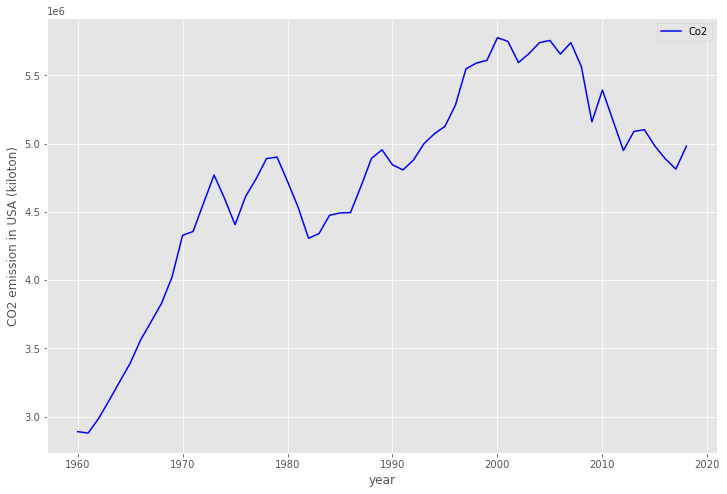

In [18]:
# plotting the data
df_usa_co2_only.plot(color='blue')
plt.ylabel('CO2 emission in USA (kiloton)')
plt.xlabel('Year')

### Predictive Analysis

#### Optimal ARIMA model

training_dataset(1960-1999) \
validation_dataset(2000-2018)

In [20]:
split_point = len(df_usa_co2_only) - 19
training, validation = df_usa_co2_only[0:split_point], df_usa_co2_only[split_point:]
print('Observations in Training %d, Validation %d' % (len(training), len(validation)))
training.to_csv('training_arima.csv')
validation.to_csv('validation_arima.csv')

Observations in Training 40, Validation 19


In [26]:
import warnings
warnings.filterwarnings("ignore")
X = df_usa_co2_only.values
X = X.astype('float64')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # ARIMA model is a class of statistical models for analyzing and forecasting time series data.
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(trend='nc', disp=0) # that trend is not constant
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)

    obs = test[i]
    history.append(obs)

residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())

# This bias is calculated as the **mean** of the residuals. 
# The residuals are the difference between the observed values and the estimated values.

                   0
count      30.000000
mean    -2904.696174
std    163645.886030
min   -322361.857305
25%   -113764.771248
50%    -13476.879814
75%    119004.933858
max    441686.556429


In [28]:
warnings.filterwarnings("ignore")

def __getnewargs__(self):
    return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
 
ARIMA.__getnewargs__ = __getnewargs__

# df_usa_co2_only.dropna(inplace=True)
X = df_usa_co2_only.values
X = X.astype('float64')

model = ARIMA(X, order=(1,1,0))
model_fit = model.fit(trend='nc', disp=0)

bias = -2904 # calculated values in above

model_fit.save('arima_model.pkl')
np.save('arima_model_bias.npy', [bias])

#### Loading the model and predicting one period in the future, based on a prediction and the bias.

In [30]:
warnings.filterwarnings("ignore")

model_fit = ARIMAResults.load('arima_model.pkl')
bias = np.load('arima_model_bias.npy')
yhat = bias + float(model_fit.forecast()[0])
print('Predicted: %.3f' % yhat)

Predicted: 5026614.766


#### Validating the model with dataset and validation sets

In [32]:
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return diff

df_usa_co2_only.dropna(inplace=True)
X = df_usa_co2_only.values
X = X.astype('float64')
stationary = difference(X)
df_X = pd.DataFrame({'Year': df_usa_co2_only.index.values, 'X':X.flatten()})

##################################################################################
# validation = df_usa_co2_only.from_csv('validation.csv')
validation = pd.read_csv('validation_arima.csv')
validation.set_index('Year', inplace=True)

def difference(validation):
    diff = list()
    for i in range(1, len(validation)):
        value = validation[i] - validation[i - 1]
        diff.append(value)
    return diff

y = validation.values 
y = y.astype('float32')
   
stationary = difference(y)

df_y = pd.DataFrame({'Year': validation.index.values, 'y':y.flatten()})

> Loaded > Predicted=5026614.766, Expected=5776410
>Predicted=6071725.649, Expected=5749250
>Predicted=5739619.861, Expected=5594160
>Predicted=5552537.115, Expected=5659630
>Predicted=5672558.189, Expected=5740030
>Predicted=5756738.124, Expected=5756080
>Predicted=5757089.835, Expected=5656580
>Predicted=5629489.071, Expected=5740270
>Predicted=5757278.861, Expected=5563340
>Predicted=5519743.596, Expected=5159550
>Predicted=5051562.599, Expected=5392870
>Predicted=5436642.720, Expected=5172100
>Predicted=5130957.208, Expected=4950210
>Predicted=4905088.602, Expected=5089500
>Predicted=5110785.510, Expected=5102580
>Predicted=5101939.660, Expected=4982790
>Predicted=4959230.999, Expected=4888640
>Predicted=4869162.498, Expected=4813720
>Predicted=4797458.792, Expected=4981300
RMSE: 251559.280


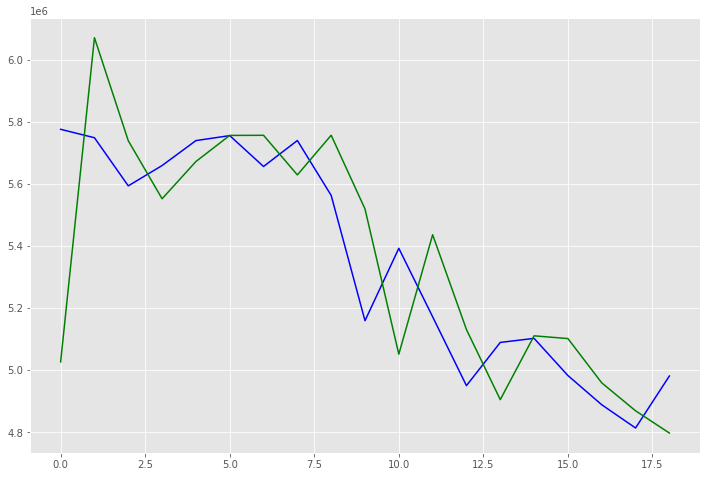

In [36]:
history = [x for x in X]

model_fit = ARIMAResults.load('arima_model.pkl')
bias = np.load('arima_model_bias.npy')

predictions = list()
yhat = bias + float(model_fit.forecast()[0])
predictions.append(yhat)
history.append(y[0])
print('> Loaded > Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))

for i in range(1, len(y)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = bias + float(model_fit.forecast()[0])
    predictions.append(yhat)

    obs=y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
pyplot.plot(y, color='blue')
pyplot.plot(predictions, color='green')
pyplot.show()

Now, have found the model, then to predict the CO2 emission level of 2030

In [38]:
model_fit = ARIMAResults.load('arima_model.pkl')
bias = np.load('arima_model_bias.npy')
forecast = model_fit.forecast(steps=29)[0]
print (forecast)

[5029518.76633986 5043393.03192847 5047385.15491781 5048533.83164309
 5048864.34706627 5048959.4481879  5048986.81218577 5048994.68578774
 5048996.95130495 5048997.60317537 5048997.79074183 5048997.84471142
 5048997.8602404  5048997.86470865 5048997.86599432 5048997.86636425
 5048997.8664707  5048997.86650132 5048997.86651014 5048997.86651267
 5048997.8665134  5048997.86651361 5048997.86651367 5048997.86651369
 5048997.8665137  5048997.8665137  5048997.8665137  5048997.8665137
 5048997.8665137 ]


According to the predictions of our model, the level of CO2 emission in 2030 will be about 5048997 kiloton.

In [39]:
# Co2 emission in 2000 (highest value)
df_usa_co2_only.iloc[40] 

Co2    5776410.0
Name: 2000, dtype: float64

### **Question**: Will Co2 emission be increased or decreased in 2030? 

Original dataset shape (244x27)
Testing criteria => Country(USA), Year and Co2 variable, dropped missing values ... so changed to (59x2)

**Preparation** 

Split dataset into two .. training [1960-1999](40) + validation [2000-2018](19)

With (1, 1, 0) parameters, run ARIMA model and find residuals/bias( true value - predictive) ?

**Predict Co2 level in 2030 (future)**

Picked up an index year => 2000, Co2 emission was 5776410.0 (kilotons)
[highest Co2 emission along 60 years historical data] \

Predict year => 2030, **Co2 emission will be 5048998 (kilotons), decreased!**

**Remeark**

Prediction was made on historical Co2 data only. No other supporting facts like using zero-emissions electric cars included in this dataset. 

### References

CO2 Emission Forecast with Python (Seasonal ARIMA). https://kaggle.com/vijaikm/co2-emission-forecast-with-python-seasonal-arima. Accessed 26 Apr. 2022.